# NOAA Weather Data Analysis - JFK Airport (New York)

In [1]:
#Analyzing and forcasting weather patterns using the NOAA Weather Dataset collected from JFK Airport in New York. 
#The dataset comprises 114,546 hourly observations of 12 key climatological variables, including temperature, wind speed, 
#humidity, and pressure. This notebook teaches the user to extract, clean and analyze sample weather data and predict weather trends to help airports schedule better flight times.

# Part 1: Data Cleaning

In [2]:
#In this section, we prepare the raw data for analysis by:

#1.Removing unnecessary or redundant columns to retain only relevant numerical features
#2.Converting data types and cleaning inconsistencies
#3.Handling missing values with appropriate filling strategies
#4.Encoding categorical weather features for downstream analysis

In [3]:
%%capture
!pip install pandas
#import and configure the required modules.
#Define requires imports
import pandas as pd
import numpy as np
import sys
import re
#These set pandas max column and row display in the notebook
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Read the raw Data

In [4]:
#Read the raw datset, displaying the first few rows of the dataframe, and taking a look at the columns and columntypes present.

In [5]:
%%capture
# Using pandas to read the data
#Since the 'DATE' column consists date-time information, we use Pandas parse_dates keyword for easier data processing.

raw_data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\jfk_weather_cleaned.csv", parse_dates=['DATE'])
raw_data.head()

In [6]:
import os
os.getcwd()

'C:\\Users\\ASUS'

# raw_data.dtypes
#to print the datatypes of each data.

# Clean the Data

In [7]:
#As you can see above, there are a lot of fields which are non-numerical - usually these will be fields that contain text or categorical data, e.g. HOURLYSKYCONDITIONS.

#There are also fields - such as the main temperature field of interest HOURLYDRYBULBTEMPF - that we expect to be numerical, but are instead object type. 
#This often indicates that there may be missing (or null) values, or some other unusual readings that we may have to deal with (since otherwise the field would have been fully parsed as a numerical data type).

#In addition, some fields relate to hourly observations, while others relate to daily or monthly intervals. 
#For purposes of later exploratory data analysis, we will restrict the dataset to a certain subset of numerical fields that relate to hourly observations.

#In this section, we refer to the NOAA Local Climatological Data Documentation to describe the fields and meaning of various values.

Select Data Columns

First, we select only the subset of data columns of interest and inspect the column types.

In [8]:
#Choose what columns to import from raw data
column_subset = [
    'DATE',
    'HOURLYVISIBILITY',
    'HOURLYDRYBULBTEMPF',
    'HOURLYWETBULBTEMPF',
    'HOURLYDewPointTempF',
    'HOURLYRelativeHumidity',
    'HOURLYWindSpeed',
    'HOURLYWindDirectionSin',
    'HOURLYWindDirectionCos',
    'HOURLYStationPressure',
    'HOURLYPressureTendencyDecr',
    'HOURLYSeaLevelPressure',
    'HOURLYPrecip',
    'HOURLYAltimeterSetting'
]

# Filter dataset to relevant columns
hourly_data = raw_data[column_subset]
# Set date index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data['DATE']))
hourly_data.drop(['DATE'], axis=1, inplace=True)
hourly_data.replace(to_replace='*', value=np.nan, inplace=True)
hourly_data.head()

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2010-01-01 01:00:00               6.0                33.0                32.0   
2010-01-01 02:00:00               6.0                33.0                33.0   
2010-01-01 03:00:00               5.0                33.0                33.0   
2010-01-01 04:00:00               5.0                33.0                33.0   
2010-01-01 05:00:00               5.0                33.0                32.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2010-01-01 01:00:00                 31.0                    92.0   
2010-01-01 02:00:00                 32.0                    96.0   
2010-01-01 03:00:00                 32.0                    96.0   
2010-01-01 04:00:00                 32.0                    96.0   
2010-01-01 05:00:00                 31.0                    92.0   

                     HOURLYWindSpeed  HOURLYWindDirectionSin  \
DATE                                                           
2010-01-01 01:00:00              0.0                     0.0   
2010-01-01 02:00:00              0.0                     0.0   
2010-01-01 03:00:00              0.0                     0.0   
2010-01-01 04:00:00              0.0                     0.0   
2010-01-01 05:00:00              0.0                     0.0   

                     HOURLYWindDirectionCos  HOURLYStationPressure  \
DATE                                                                 
2010-01-01 01:00:00                     1.0                  29.97   
2010-01-01 02:00:00                     1.0                  29.97   
2010-01-01 03:00:00                     1.0                  29.97   
2010-01-01 04:00:00                     1.0                  29.95   
2010-01-01 05:00:00                     1.0                  29.93   

                     HOURLYPressureTendencyDecr  HOURLYSeaLevelPressure  \
DATE                                                                      
2010-01-01 01:00:00                           1                   29.99   
2010-01-01 02:00:00                           1                   29.99   
2010-01-01 03:00:00                           1                   29.99   
2010-01-01 04:00:00                           1                   29.97   
2010-01-01 05:00:00                           1                   29.96   

                     HOURLYPrecip  HOURLYAltimeterSetting  
DATE                                                       
2010-01-01 01:00:00          0.01                   29.99  
2010-01-01 02:00:00          0.02                   29.99  
2010-01-01 03:00:00          0.00                   29.99  
2010-01-01 04:00:00          0.00                   29.97  
2010-01-01 05:00:00          0.00                   29.95

In [9]:
#hourly_data.reset_index(inplace=True)

In [10]:
hourly_data.dtypes

HOURLYVISIBILITY              float64
HOURLYDRYBULBTEMPF            float64
HOURLYWETBULBTEMPF            float64
HOURLYDewPointTempF           float64
HOURLYRelativeHumidity        float64
HOURLYWindSpeed               float64
HOURLYWindDirectionSin        float64
HOURLYWindDirectionCos        float64
HOURLYStationPressure         float64
HOURLYPressureTendencyDecr      int64
HOURLYSeaLevelPressure        float64
HOURLYPrecip                  float64
HOURLYAltimeterSetting        float64
dtype: object

# Clean up precipitation column

From the dataframe preview above, we can see that the column HOURLYPrecip - which is the hourly measure of precipitation levels - contains both NaN and T values. T specifies trace amounts of precipitation, while NaN means not a number, and is used to denote missing values.

We can also inspect the unique values present for the field.

In [11]:
hourly_data['HOURLYPrecip'].unique()

array([1.00000e-02, 2.00000e-02, 0.00000e+00, 1.00000e-01, 7.00000e-02,
       3.00000e-02, 5.00000e-02, 1.50000e-01, 6.00000e-02, 8.00000e-02,
       9.00000e-02, 1.10000e-01, 2.00000e-01, 4.00000e-02, 1.30000e-01,
       1.20000e-01, 2.40000e-01, 1.40000e-01, 1.70000e-01, 1.60000e-01,
       4.70000e-01, 2.20000e-01, 1.80000e-01, 2.60000e-01, 2.30000e-01,
       3.30000e-01, 1.90000e-01, 4.00000e-01, 5.00000e-01, 2.10000e-01,
       3.60000e-01, 5.40000e-01, 3.40000e-01, 1.15000e+00, 3.90000e-01,
       3.50000e-01, 6.70000e-01, 3.20000e-01, 1.10000e+00, 5.10000e-01,
       1.50000e-02, 2.50000e-02, 5.00000e-03, 5.50000e-02, 5.20000e-01,
       2.50000e-01, 3.80000e-01, 3.00000e-01, 7.30000e-01, 2.41000e+00,
       5.70000e-01, 6.50000e-01, 2.70000e-01, 6.00000e-01, 4.50000e-01,
       2.90000e-01, 1.26000e+00, 4.20000e-01, 5.90000e-01, 7.90000e-01,
       1.05000e-01, 2.80000e-01, 5.30000e-01, 9.30000e-01, 4.30000e-01,
       1.52000e+00, 1.76000e+00, 3.70000e-01, 6.66667e-04, 1.333

There appears to be an error of some sort. To deal with T values, we will set the observation to be 0. We will also replace the erroneous value with NaN.

In [12]:
%%capture
# Fix imported data
hourly_data['HOURLYPrecip'].replace(to_replace='T', value='0.00', inplace=True)
hourly_data['HOURLYPrecip'].replace('0.020.01s', np.nan, inplace=True)

# Convert columns to numerical types

Next, we will convert string columns that refer to numerical values to numerical types. For columns such as HOURLYPrecip, we first also drop the non-numerical parts of the value (the s character).

In [13]:
# Set of columns to convert
messy_columns = column_subset[1:]

#Convert columns to float32 database
for i in messy_columns:
    hourly_data[i] = hourly_data[i].apply(lambda x: re.sub('[^0-9,.-]', '', x) if type(x) == str else x).replace('', np.nan).astype(('float32'))

We can now see that all the fields have numerical datatypes.

In [14]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75119 entries, 2010-01-01 01:00:00 to 2018-07-27 23:00:00
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HOURLYVISIBILITY            75119 non-null  float32
 1   HOURLYDRYBULBTEMPF          75119 non-null  float32
 2   HOURLYWETBULBTEMPF          75119 non-null  float32
 3   HOURLYDewPointTempF         75119 non-null  float32
 4   HOURLYRelativeHumidity      75119 non-null  float32
 5   HOURLYWindSpeed             75119 non-null  float32
 6   HOURLYWindDirectionSin      75119 non-null  float32
 7   HOURLYWindDirectionCos      75119 non-null  float32
 8   HOURLYStationPressure       75119 non-null  float32
 9   HOURLYPressureTendencyDecr  75119 non-null  float32
 10  HOURLYSeaLevelPressure      75119 non-null  float32
 11  HOURLYPrecip                75119 non-null  float32
 12  HOURLYAltimeterSetting      75119 non-null  float32
d

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2010-01-01 01:00:00               6.0                33.0                32.0   
2010-01-01 02:00:00               6.0                33.0                33.0   
2010-01-01 03:00:00               5.0                33.0                33.0   
2010-01-01 04:00:00               5.0                33.0                33.0   
2010-01-01 05:00:00               5.0                33.0                32.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2010-01-01 01:00:00                 31.0                    92.0   
2010-01-01 02:00:00                 32.0                    96.0   
2010-01-01 03:00:00                 32.0                    96.0   
2010-01-01 04:00:00                 32.0                    96.0   
2010-01-01 05:00:00                 31.0                    92.0   

                     HOURLYWindSpeed  HOURLYWindDirectionSin  \
DATE                                                           
2010-01-01 01:00:00              0.0                     0.0   
2010-01-01 02:00:00              0.0                     0.0   
2010-01-01 03:00:00              0.0                     0.0   
2010-01-01 04:00:00              0.0                     0.0   
2010-01-01 05:00:00              0.0                     0.0   

                     HOURLYWindDirectionCos  HOURLYStationPressure  \
DATE                                                                 
2010-01-01 01:00:00                     1.0              29.969999   
2010-01-01 02:00:00                     1.0              29.969999   
2010-01-01 03:00:00                     1.0              29.969999   
2010-01-01 04:00:00                     1.0              29.950001   
2010-01-01 05:00:00                     1.0              29.930000   

                     HOURLYPressureTendencyDecr  HOURLYSeaLevelPressure  \
DATE                                                                      
2010-01-01 01:00:00                         1.0               29.990000   
2010-01-01 02:00:00                         1.0               29.990000   
2010-01-01 03:00:00                         1.0               29.990000   
2010-01-01 04:00:00                         1.0               29.969999   
2010-01-01 05:00:00                         1.0               29.959999   

                     HOURLYPrecip  HOURLYAltimeterSetting  
DATE                                                       
2010-01-01 01:00:00          0.01               29.990000  
2010-01-01 02:00:00          0.02               29.990000  
2010-01-01 03:00:00          0.00               29.990000  
2010-01-01 04:00:00          0.00               29.969999  
2010-01-01 05:00:00          0.00               29.950001

# Reformat and process data

Next, we will clean up some of the data columns to ensure their values fall within the parameters defined by the NOAA documentation (referred to above).

In [15]:
#Generate the summary statistics for each column.
hourly_data.describe()

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
count      75119.000000        75119.000000        75119.000000   
mean           9.205811           55.355511           49.333832   
std            2.208713           17.393103           16.177832   
min            0.000000            1.000000           -1.000000   
25%           10.000000           42.000000           36.000000   
50%           10.000000           56.000000           50.000000   
75%           10.000000           70.000000           63.000000   
max           10.000000          102.000000           85.000000   

       HOURLYDewPointTempF  HOURLYRelativeHumidity  HOURLYWindSpeed  \
count         75119.000000            75119.000000     75119.000000   
mean             42.422222               64.809944        11.252965   
std              19.577814               19.899248         6.098579   
min             -19.000000                8.000000         0.000000   
25%              27.000000               49.000000         7.000000   
50%              44.000000               66.000000        10.000000   
75%              59.000000               82.000000        15.000000   
max              84.000000              100.000000        53.000000   

       HOURLYWindDirectionSin  HOURLYWindDirectionCos  HOURLYStationPressure  \
count            75119.000000            7.511900e+04           75119.000000   
mean                -0.166452            2.867747e-02              30.004955   
std                  0.629000            7.587613e-01               0.234239   
min                 -1.000000           -1.000000e+00              28.490000   
25%                 -0.766044           -7.660440e-01              29.860001   
50%                 -0.173648            6.123230e-17              30.000000   
75%                  0.342020            7.660440e-01              30.150000   
max                  1.000000            1.000000e+00              30.830000   

       HOURLYPressureTendencyDecr  HOURLYSeaLevelPressure  HOURLYPrecip  \
count                75119.000000            75119.000000  75119.000000   
mean                     0.490835               30.025898      0.004574   
std                      0.499863                0.233954      0.033577   
min                      0.000000               28.540001      0.000000   
25%                      0.000000               29.879999      0.000000   
50%                      0.000000               30.020000      0.000000   
75%                      1.000000               30.170000      0.000000   
max                      1.000000               30.850000      2.410000   

       HOURLYAltimeterSetting  
count            75119.000000  
mean                30.024824  
std                  0.234198  
min                 28.510000  
25%                 29.879999  
50%                 30.020000  
75%                 30.170000  
max                 30.850000

According to the documentation, the HOURLYPressureTendency field should be an integer value in the range [0, 8]. Let's check if this condition holds for this dataset.

In [16]:
hourly_data.columns = hourly_data.columns.str.strip()

In [17]:
#Check if categorical variable HOURLYPressureTendency ever has a non-integer entry outside the bounds of 0-8
cond = len(hourly_data[~hourly_data['HOURLYPressureTendencyDecr'].isin(list(range(0,9)) + [np.nan])])
print('Hourly Pressure Tendency should be between 0 and 8: {}'.format(cond == 0))


Hourly Pressure Tendency should be between 0 and 8: True


In [18]:
print(hourly_data.shape)
print(hourly_data.columns)

(75119, 13)
Index(['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirectionSin', 'HOURLYWindDirectionCos',
       'HOURLYStationPressure', 'HOURLYPressureTendencyDecr',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting'],
      dtype='object')


Hourly Pressure Tendency should be between 0 and 8:True The HOURLYVISIBLITY should be an integer in an range [0,10]. Let's check this condition too.

In [19]:
#Hourly visibility should be between 0 and 10.
hourly_data[(hourly_data['HOURLYVISIBILITY']<0) | (hourly_data['HOURLYVISIBILITY']>10)]

Empty DataFrame
Columns: [HOURLYVISIBILITY, HOURLYDRYBULBTEMPF, HOURLYWETBULBTEMPF, HOURLYDewPointTempF, HOURLYRelativeHumidity, HOURLYWindSpeed, HOURLYWindDirectionSin, HOURLYWindDirectionCos, HOURLYStationPressure, HOURLYPressureTendencyDecr, HOURLYSeaLevelPressure, HOURLYPrecip, HOURLYAltimeterSetting]
Index: []

Here all the observations are under the range. If any of the observation falls outside the given range, These must be spurious data observations and we handle them by replacing them with NaN. 

In [20]:
#Replace any hourly visibility figure outside these bounds with nan
hourly_data.loc[hourly_data['HOURLYVISIBILITY'] > 10, 'HOURLYVISIBILITY'] = np.nan

#Hourly Visibility hsould be between 0 and 10
cond = len(hourly_data[(hourly_data['HOURLYVISIBILITY']<0) | (hourly_data['HOURLYVISIBILITY']>10)])
print('Hourly Visibility should be between 0 and 10: {}'.format(cond==0))

Hourly Visibility should be between 0 and 10: True


Finally, we check if there any duplicates with respect to our DATE index and check furthermore that our dates are in the correct order (that is, strictly increasing).

In [21]:
cond = len(hourly_data[hourly_data.index.duplicated()].sort_index())
print('Date index contains no duplicate entries: {}'.format(cond==0))

Date index contains no duplicate entries: True


In [22]:
#Make sure that time index is sorted and indexing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [23]:
hourly_data.reset_index(inplace=True)

In [24]:
hourly_data.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirectionSin', 'HOURLYWindDirectionCos',
       'HOURLYStationPressure', 'HOURLYPressureTendencyDecr',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting'],
      dtype='object')

We will now also replace missing values. For numerical values, we will linearly interpolate between the previous and next valid observations. For the categorical HOURLYPressureTendency field, we will replace missing value with the last valid observation.

In [25]:
# Forward fill pressure tendency
hourly_data['HOURLYPressureTendencyDecr'] = (
    hourly_data['HOURLYPressureTendencyDecr'].ffill()
)

# Interpolate only numeric columns
numeric_cols = hourly_data.select_dtypes(include='number').columns
hourly_data[numeric_cols] = hourly_data[numeric_cols].interpolate(method='linear')

# Drop first row
hourly_data.drop(hourly_data.index[0], inplace=True)

In [26]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75118 entries, 1 to 75118
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        75118 non-null  datetime64[ns]
 1   HOURLYVISIBILITY            75118 non-null  float32       
 2   HOURLYDRYBULBTEMPF          75118 non-null  float32       
 3   HOURLYWETBULBTEMPF          75118 non-null  float32       
 4   HOURLYDewPointTempF         75118 non-null  float32       
 5   HOURLYRelativeHumidity      75118 non-null  float32       
 6   HOURLYWindSpeed             75118 non-null  float32       
 7   HOURLYWindDirectionSin      75118 non-null  float32       
 8   HOURLYWindDirectionCos      75118 non-null  float32       
 9   HOURLYStationPressure       75118 non-null  float32       
 10  HOURLYPressureTendencyDecr  75118 non-null  float32       
 11  HOURLYSeaLevelPressure      75118 non-null  float32   

DATE  HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  \
1 2010-01-01 02:00:00               6.0                33.0   
2 2010-01-01 03:00:00               5.0                33.0   
3 2010-01-01 04:00:00               5.0                33.0   
4 2010-01-01 05:00:00               5.0                33.0   
5 2010-01-01 06:00:00               5.0                33.0   

   HOURLYWETBULBTEMPF  HOURLYDewPointTempF  HOURLYRelativeHumidity  \
1                33.0                 32.0                    96.0   
2                33.0                 32.0                    96.0   
3                33.0                 32.0                    96.0   
4                32.0                 31.0                    92.0   
5                32.0                 31.0                    92.0   

   HOURLYWindSpeed  HOURLYWindDirectionSin  HOURLYWindDirectionCos  \
1              0.0                     0.0                     1.0   
2              0.0                     0.0                     1.0   
3              0.0                     0.0                     1.0   
4              0.0                     0.0                     1.0   
5              0.0                     0.0                     1.0   

   HOURLYStationPressure  HOURLYPressureTendencyDecr  HOURLYSeaLevelPressure  \
1              29.969999                         1.0               29.990000   
2              29.969999                         1.0               29.990000   
3              29.950001                         1.0               29.969999   
4              29.930000                         1.0               29.959999   
5              29.950001                         1.0               29.969999   

   HOURLYPrecip  HOURLYAltimeterSetting  
1          0.02               29.990000  
2          0.00               29.990000  
3          0.00               29.969999  
4          0.00               29.950001  
5          0.00               29.969999

# Feature encoding

The final pre-processing step we will be to handle two of our columns in a special way in order to correctly encode these features. They are:
    HOURLYWindDirection - wind direction
    HOURLYPressureTendency - an indicator of pressure changes
For HOURLYWindDirection, we encode the raw feature value as two new values, which measure the cyclical nature of wind direction - that is, we are encoding the compass-point nature of wind direction measurements.

In [28]:
#The original wind direction column has already been transformed
#Since the cyclical transformation is already done, you can skip this entire block.
#Your dataset is already ML-ready in this regard.
if 'HOURLYWindDirection' in hourly_data.columns:
    hourly_data['HOURLYWindDirectionSin'] = np.sin(
        hourly_data['HOURLYWindDirection'] * (2 * np.pi / 360)
    )
    hourly_data['HOURLYWindDirectionCos'] = np.cos(
        hourly_data['HOURLYWindDirection'] * (2 * np.pi / 360)
    )
    hourly_data.drop('HOURLYWindDirection', axis=1, inplace=True)


In [31]:
#Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
#hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
#hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
#hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
#hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
#hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
#hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
#hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

# Rename Columns

Before saving the dataset, we will rename the columns for readability.

In [29]:
print(hourly_data.columns)

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirectionSin', 'HOURLYWindDirectionCos',
       'HOURLYStationPressure', 'HOURLYPressureTendencyDecr',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting'],
      dtype='object')


In [33]:
#define the new column names
columns_new_name = [
    'Date',
    'Visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

hourly_data_renamed = hourly_data.rename(columns=columns_name_map)

In [34]:
print(hourly_data_renamed.info())
print()
hourly_data_renamed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75118 entries, 1 to 75118
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    75118 non-null  datetime64[ns]
 1   Visibility              75118 non-null  float32       
 2   dry_bulb_temp_f         75118 non-null  float32       
 3   wet_bulb_temp_f         75118 non-null  float32       
 4   dew_point_temp_f        75118 non-null  float32       
 5   relative_humidity       75118 non-null  float32       
 6   wind_speed              75118 non-null  float32       
 7   station_pressure        75118 non-null  float32       
 8   sea_level_pressure      75118 non-null  float32       
 9   precip                  75118 non-null  float32       
 10  altimeter_setting       75118 non-null  float32       
 11  wind_direction_sin      75118 non-null  float32       
 12  wind_direction_cos      75118 non-null  float3

Date  Visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
1 2010-01-01 02:00:00         6.0             33.0             33.0   
2 2010-01-01 03:00:00         5.0             33.0             33.0   
3 2010-01-01 04:00:00         5.0             33.0             33.0   
4 2010-01-01 05:00:00         5.0             33.0             32.0   
5 2010-01-01 06:00:00         5.0             33.0             32.0   

   dew_point_temp_f  relative_humidity  wind_speed  station_pressure  \
1              32.0               96.0         0.0               0.0   
2              32.0               96.0         0.0               0.0   
3              32.0               96.0         0.0               0.0   
4              31.0               92.0         0.0               0.0   
5              31.0               92.0         0.0               0.0   

   sea_level_pressure     precip  altimeter_setting  wind_direction_sin  \
1                 1.0  29.969999                1.0           29.990000   
2                 1.0  29.969999                1.0           29.990000   
3                 1.0  29.950001                1.0           29.969999   
4                 1.0  29.930000                1.0           29.959999   
5                 1.0  29.950001                1.0           29.969999   

   wind_direction_cos  pressure_tendency_incr  
1                0.02               29.990000  
2                0.00               29.990000  
3                0.00               29.969999  
4                0.00               29.950001  
5                0.00               29.969999

In [37]:
hourly_data_renamed['Date'] = pd.to_datetime(hourly_data_renamed['Date'])
hourly_data_renamed.set_index('Date', inplace=True)

In [36]:
print(hourly_data_renamed.columns)
print(hourly_data_renamed.index)

Index(['Date', 'Visibility', 'dry_bulb_temp_f', 'wet_bulb_temp_f',
       'dew_point_temp_f', 'relative_humidity', 'wind_speed',
       'station_pressure', 'sea_level_pressure', 'precip', 'altimeter_setting',
       'wind_direction_sin', 'wind_direction_cos', 'pressure_tendency_incr'],
      dtype='object')
Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            75109, 75110, 75111, 75112, 75113, 75114, 75115, 75116, 75117,
            75118],
           dtype='int64', length=75118)


In [38]:
#To verify that our timeseries index is correctly set-
print(type(hourly_data_renamed.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [39]:
# Explore some general information about the dataset
print('# of megabytes held by dataframe: ' + str(round(sys.getsizeof(hourly_data_renamed) / 1000000,2)))
print('# of features: ' + str(hourly_data_renamed.shape[1])) 
print('# of observations: ' + str(hourly_data_renamed.shape[0]))
print('Start date: ' + str(hourly_data_renamed.index[0]))
print('End date: ' + str(hourly_data_renamed.index[-1]))
print('# of days: ' + str((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days))
print('# of months: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/30,2)))
print('# of years: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/365,2)))

# of megabytes held by dataframe: 4.51
# of features: 13
# of observations: 75118
Start date: 2010-01-01 02:00:00
End date: 2018-07-27 23:00:00
# of days: 3129
# of months: 104.3
# of years: 8.57


# Save the cleaned Data

Finally, we save the cleaned dataset.

In [40]:
hourly_data_renamed.to_csv("jfk_weather_cleaned.csv", float_format='%g')

In [41]:
hourly_data_renamed

Visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
Date                                                                
2010-01-01 02:00:00         6.0             33.0             33.0   
2010-01-01 03:00:00         5.0             33.0             33.0   
2010-01-01 04:00:00         5.0             33.0             33.0   
2010-01-01 05:00:00         5.0             33.0             32.0   
2010-01-01 06:00:00         5.0             33.0             32.0   
...                         ...              ...              ...   
2018-07-27 19:00:00        10.0             76.0             73.0   
2018-07-27 20:00:00         4.0             69.0             69.0   
2018-07-27 21:00:00        10.0             71.0             70.0   
2018-07-27 22:00:00        10.0             72.0             71.0   
2018-07-27 23:00:00        10.0             72.0             71.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
Date                                                                   
2010-01-01 02:00:00              32.0               96.0         0.0   
2010-01-01 03:00:00              32.0               96.0         0.0   
2010-01-01 04:00:00              32.0               96.0         0.0   
2010-01-01 05:00:00              31.0               92.0         0.0   
2010-01-01 06:00:00              31.0               92.0         0.0   
...                               ...                ...         ...   
2018-07-27 19:00:00              72.0               88.0         3.0   
2018-07-27 20:00:00              69.0              100.0        13.0   
2018-07-27 21:00:00              70.0               96.0         0.0   
2018-07-27 22:00:00              70.0               94.0         5.0   
2018-07-27 23:00:00              71.0               97.0         0.0   

                     station_pressure  sea_level_pressure     precip  \
Date                                                                   
2010-01-01 02:00:00          0.000000            1.000000  29.969999   
2010-01-01 03:00:00          0.000000            1.000000  29.969999   
2010-01-01 04:00:00          0.000000            1.000000  29.950001   
2010-01-01 05:00:00          0.000000            1.000000  29.930000   
2010-01-01 06:00:00          0.000000            1.000000  29.950001   
...                               ...                 ...        ...   
2018-07-27 19:00:00         -0.766044           -0.642788  30.000000   
2018-07-27 20:00:00          0.642788            0.766044  29.990000   
2018-07-27 21:00:00          0.000000            1.000000  30.020000   
2018-07-27 22:00:00          0.766044            0.642788  30.000000   
2018-07-27 23:00:00          0.000000            1.000000  30.010000   

                     altimeter_setting  wind_direction_sin  \
Date                                                         
2010-01-01 02:00:00                1.0           29.990000   
2010-01-01 03:00:00                1.0           29.990000   
2010-01-01 04:00:00                1.0           29.969999   
2010-01-01 05:00:00                1.0           29.959999   
2010-01-01 06:00:00                1.0           29.969999   
...                                ...                 ...   
2018-07-27 19:00:00                0.0           30.020000   
2018-07-27 20:00:00                0.0           30.010000   
2018-07-27 21:00:00                0.0           30.040001   
2018-07-27 22:00:00                0.0           30.020000   
2018-07-27 23:00:00                0.0           30.030001   

                     wind_direction_cos  pressure_tendency_incr  
Date                                                             
2010-01-01 02:00:00                0.02               29.990000  
2010-01-01 03:00:00                0.00               29.990000  
2010-01-01 04:00:00                0.00               29.969999  
2010-01-01 05:00:00                0.00               29.950001  
2010-01-01 06:00:00                0.00       

# Part 2: Exploratorty Data Analysis (EDA)

In [42]:
%%capture
# Installing packages needed for data processing and visualization.
!pip install pandas matplotlib seaborn numpy

In [43]:
import seaborn as sns
from pandas import DataFrame as df
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 160

In [44]:
data = pd.read_csv("jfk_weather_cleaned.csv")

Read the Cleaned Data
We start by reading the cleaned dataset that was saved in 'Part 1 - Data Cleaning'

In [45]:
data.head()

Date  Visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
0  2010-01-01 02:00:00         6.0             33.0             33.0   
1  2010-01-01 03:00:00         5.0             33.0             33.0   
2  2010-01-01 04:00:00         5.0             33.0             33.0   
3  2010-01-01 05:00:00         5.0             33.0             32.0   
4  2010-01-01 06:00:00         5.0             33.0             32.0   

   dew_point_temp_f  relative_humidity  wind_speed  station_pressure  \
0              32.0               96.0         0.0               0.0   
1              32.0               96.0         0.0               0.0   
2              32.0               96.0         0.0               0.0   
3              31.0               92.0         0.0               0.0   
4              31.0               92.0         0.0               0.0   

   sea_level_pressure  precip  altimeter_setting  wind_direction_sin  \
0                 1.0   29.97                  1               29.99   
1                 1.0   29.97                  1               29.99   
2                 1.0   29.95                  1               29.97   
3                 1.0   29.93                  1               29.96   
4                 1.0   29.95                  1               29.97   

   wind_direction_cos  pressure_tendency_incr  
0                0.02                   29.99  
1                0.00                   29.99  
2                0.00                   29.97  
3                0.00                   29.95  
4                0.00                   29.97

In [47]:
data = pd.read_csv("jfk_weather_cleaned.csv", parse_dates=['Date'])
#Set date index
data = data.set_index(pd.DatetimeIndex(data['Date']))
data.drop(['Date'], axis=1, inplace=True)
data.head()

Visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
Date                                                                
2010-01-01 02:00:00         6.0             33.0             33.0   
2010-01-01 03:00:00         5.0             33.0             33.0   
2010-01-01 04:00:00         5.0             33.0             33.0   
2010-01-01 05:00:00         5.0             33.0             32.0   
2010-01-01 06:00:00         5.0             33.0             32.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
Date                                                                   
2010-01-01 02:00:00              32.0               96.0         0.0   
2010-01-01 03:00:00              32.0               96.0         0.0   
2010-01-01 04:00:00              32.0               96.0         0.0   
2010-01-01 05:00:00              31.0               92.0         0.0   
2010-01-01 06:00:00              31.0               92.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
Date                                                                
2010-01-01 02:00:00               0.0                 1.0   29.97   
2010-01-01 03:00:00               0.0                 1.0   29.97   
2010-01-01 04:00:00               0.0                 1.0   29.95   
2010-01-01 05:00:00               0.0                 1.0   29.93   
2010-01-01 06:00:00               0.0                 1.0   29.95   

                     altimeter_setting  wind_direction_sin  \
Date                                                         
2010-01-01 02:00:00                  1               29.99   
2010-01-01 03:00:00                  1               29.99   
2010-01-01 04:00:00                  1               29.97   
2010-01-01 05:00:00                  1               29.96   
2010-01-01 06:00:00                  1               29.97   

                     wind_direction_cos  pressure_tendency_incr  
Date                                                             
2010-01-01 02:00:00                0.02                   29.99  
2010-01-01 03:00:00                0.00                   29.99  
2010-01-01 04:00:00                0.00                   29.97  
2010-01-01 05:00:00                0.00                   29.95  
2010-01-01 06:00:00                0.00                   29.97

# Visualize the Data

In this section we visualize a few sections of the data, using matplotlib's pyplot module.

In [48]:
# Columns to visualize
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']

Quick Peek at the Data

We first visualize all the data we have to get a rough idea about how the data looks like.

As we can see in the plot below, the hourly temperatures follow a clear seasonal trend. Wind speed, pressure, humidity and precipitation data seem to have much higher variance and randomness.

It might be more meaningful to make a model to predict temperature, rather than some of the other more noisy data columns.

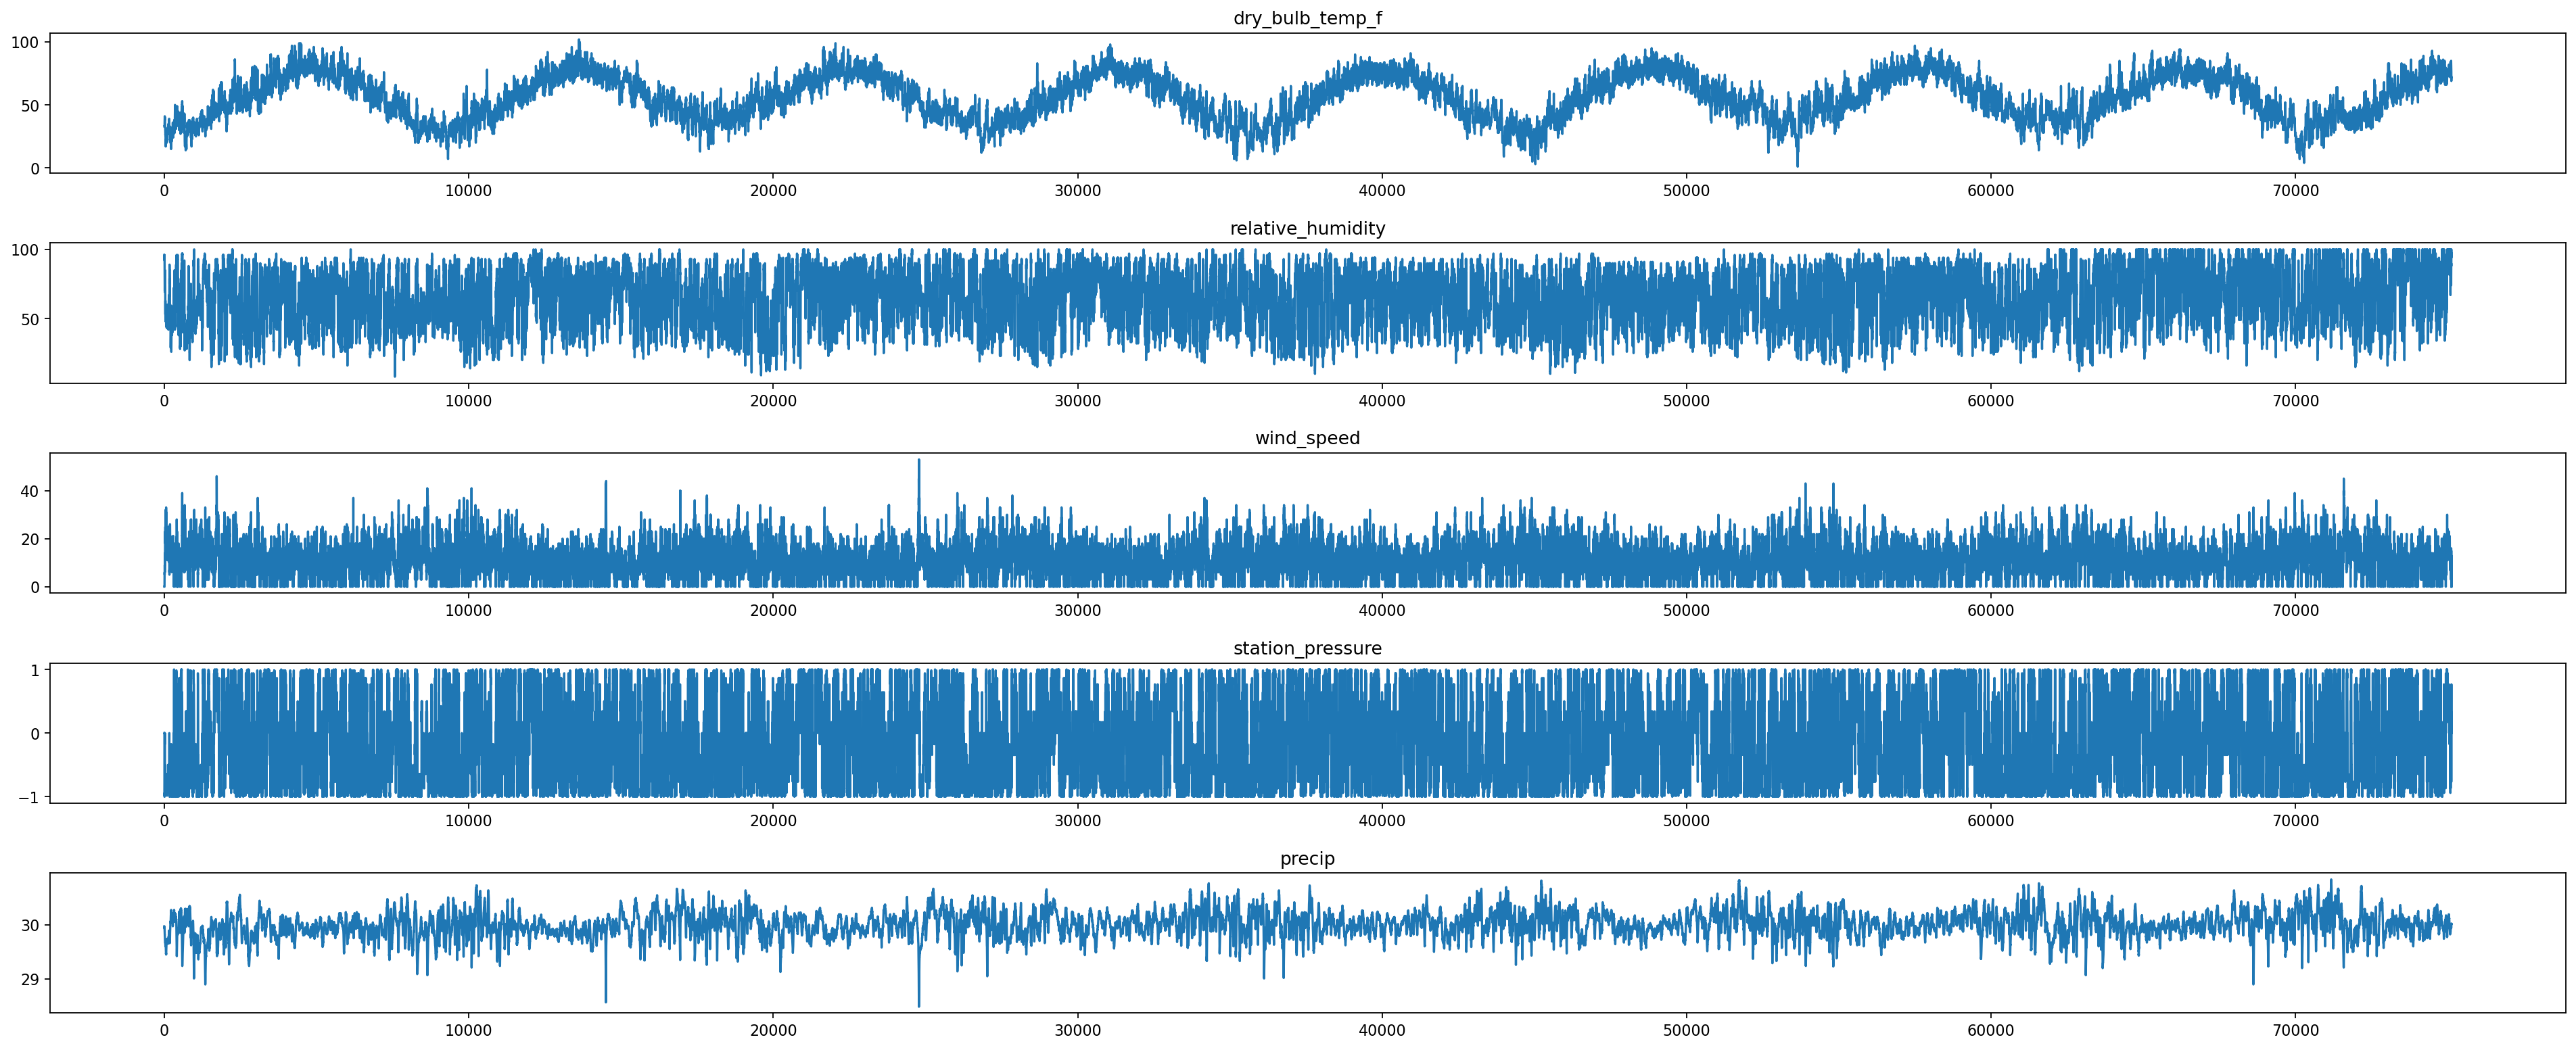

In [49]:
# Quick overview of columns
plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

**Feature Dependencies**

Now we explore how the features (columns) of our data are related to each other. This helps in deciding which features to use when modelling a classifier or regresser. We ideally want independent features to be classified independently and likewise dependent features to be contributing to the same model.

We can see from the correlation plots how some features are somewhat correlated and could be used as additional data (perhaps for augmenting) when training a classifier.

C:\Users\ASUS\AppData\Local\Temp/ipykernel_35524/285352701.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);


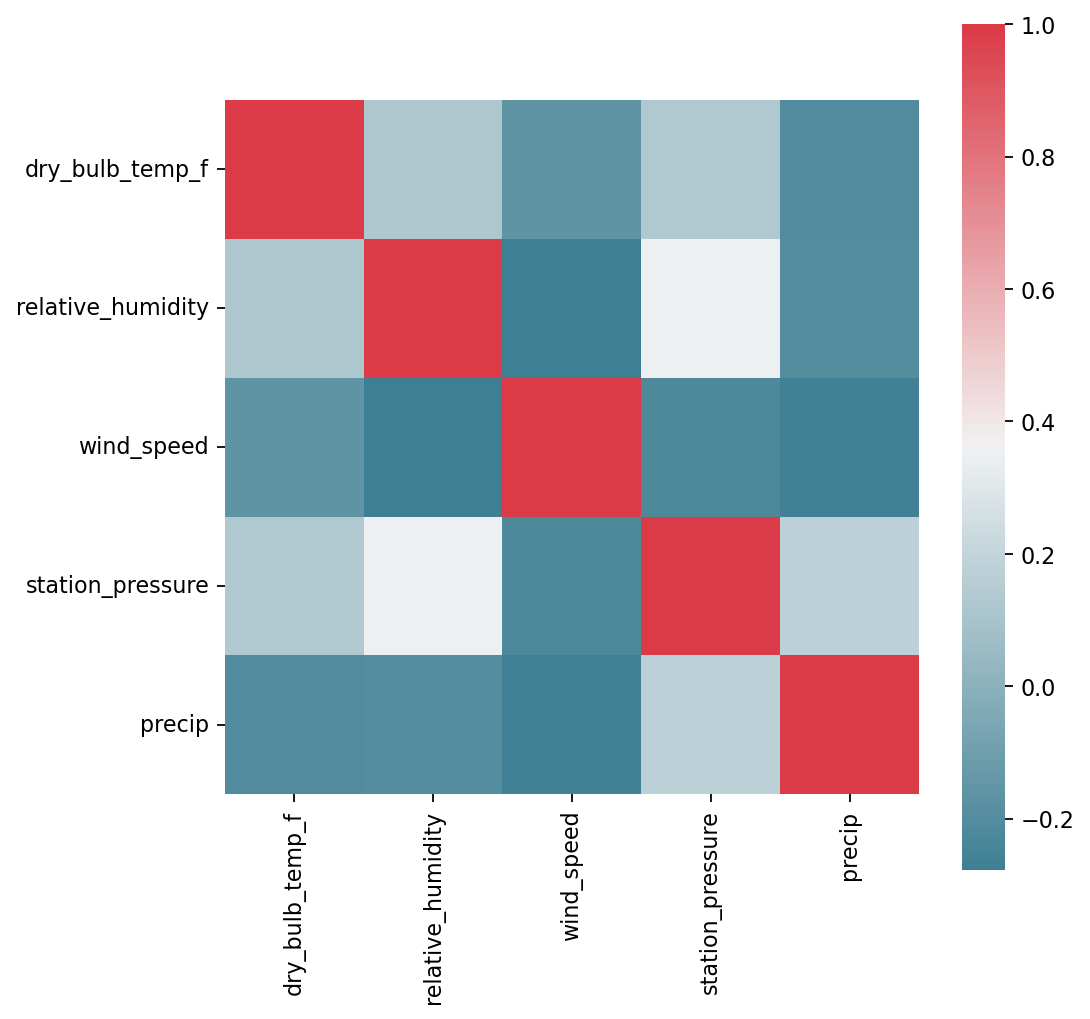

In [50]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

Additionally we also visualize the joint distributions in the form of pairplots/scatter plots to see (qualitatively) the way in which these features are related in more detail over just the correlation. They are essentially 2D joint distributions in the case of off-diagonal subplots and the histogram (in approximation to the probability distribution) in case of diagonal subplots.

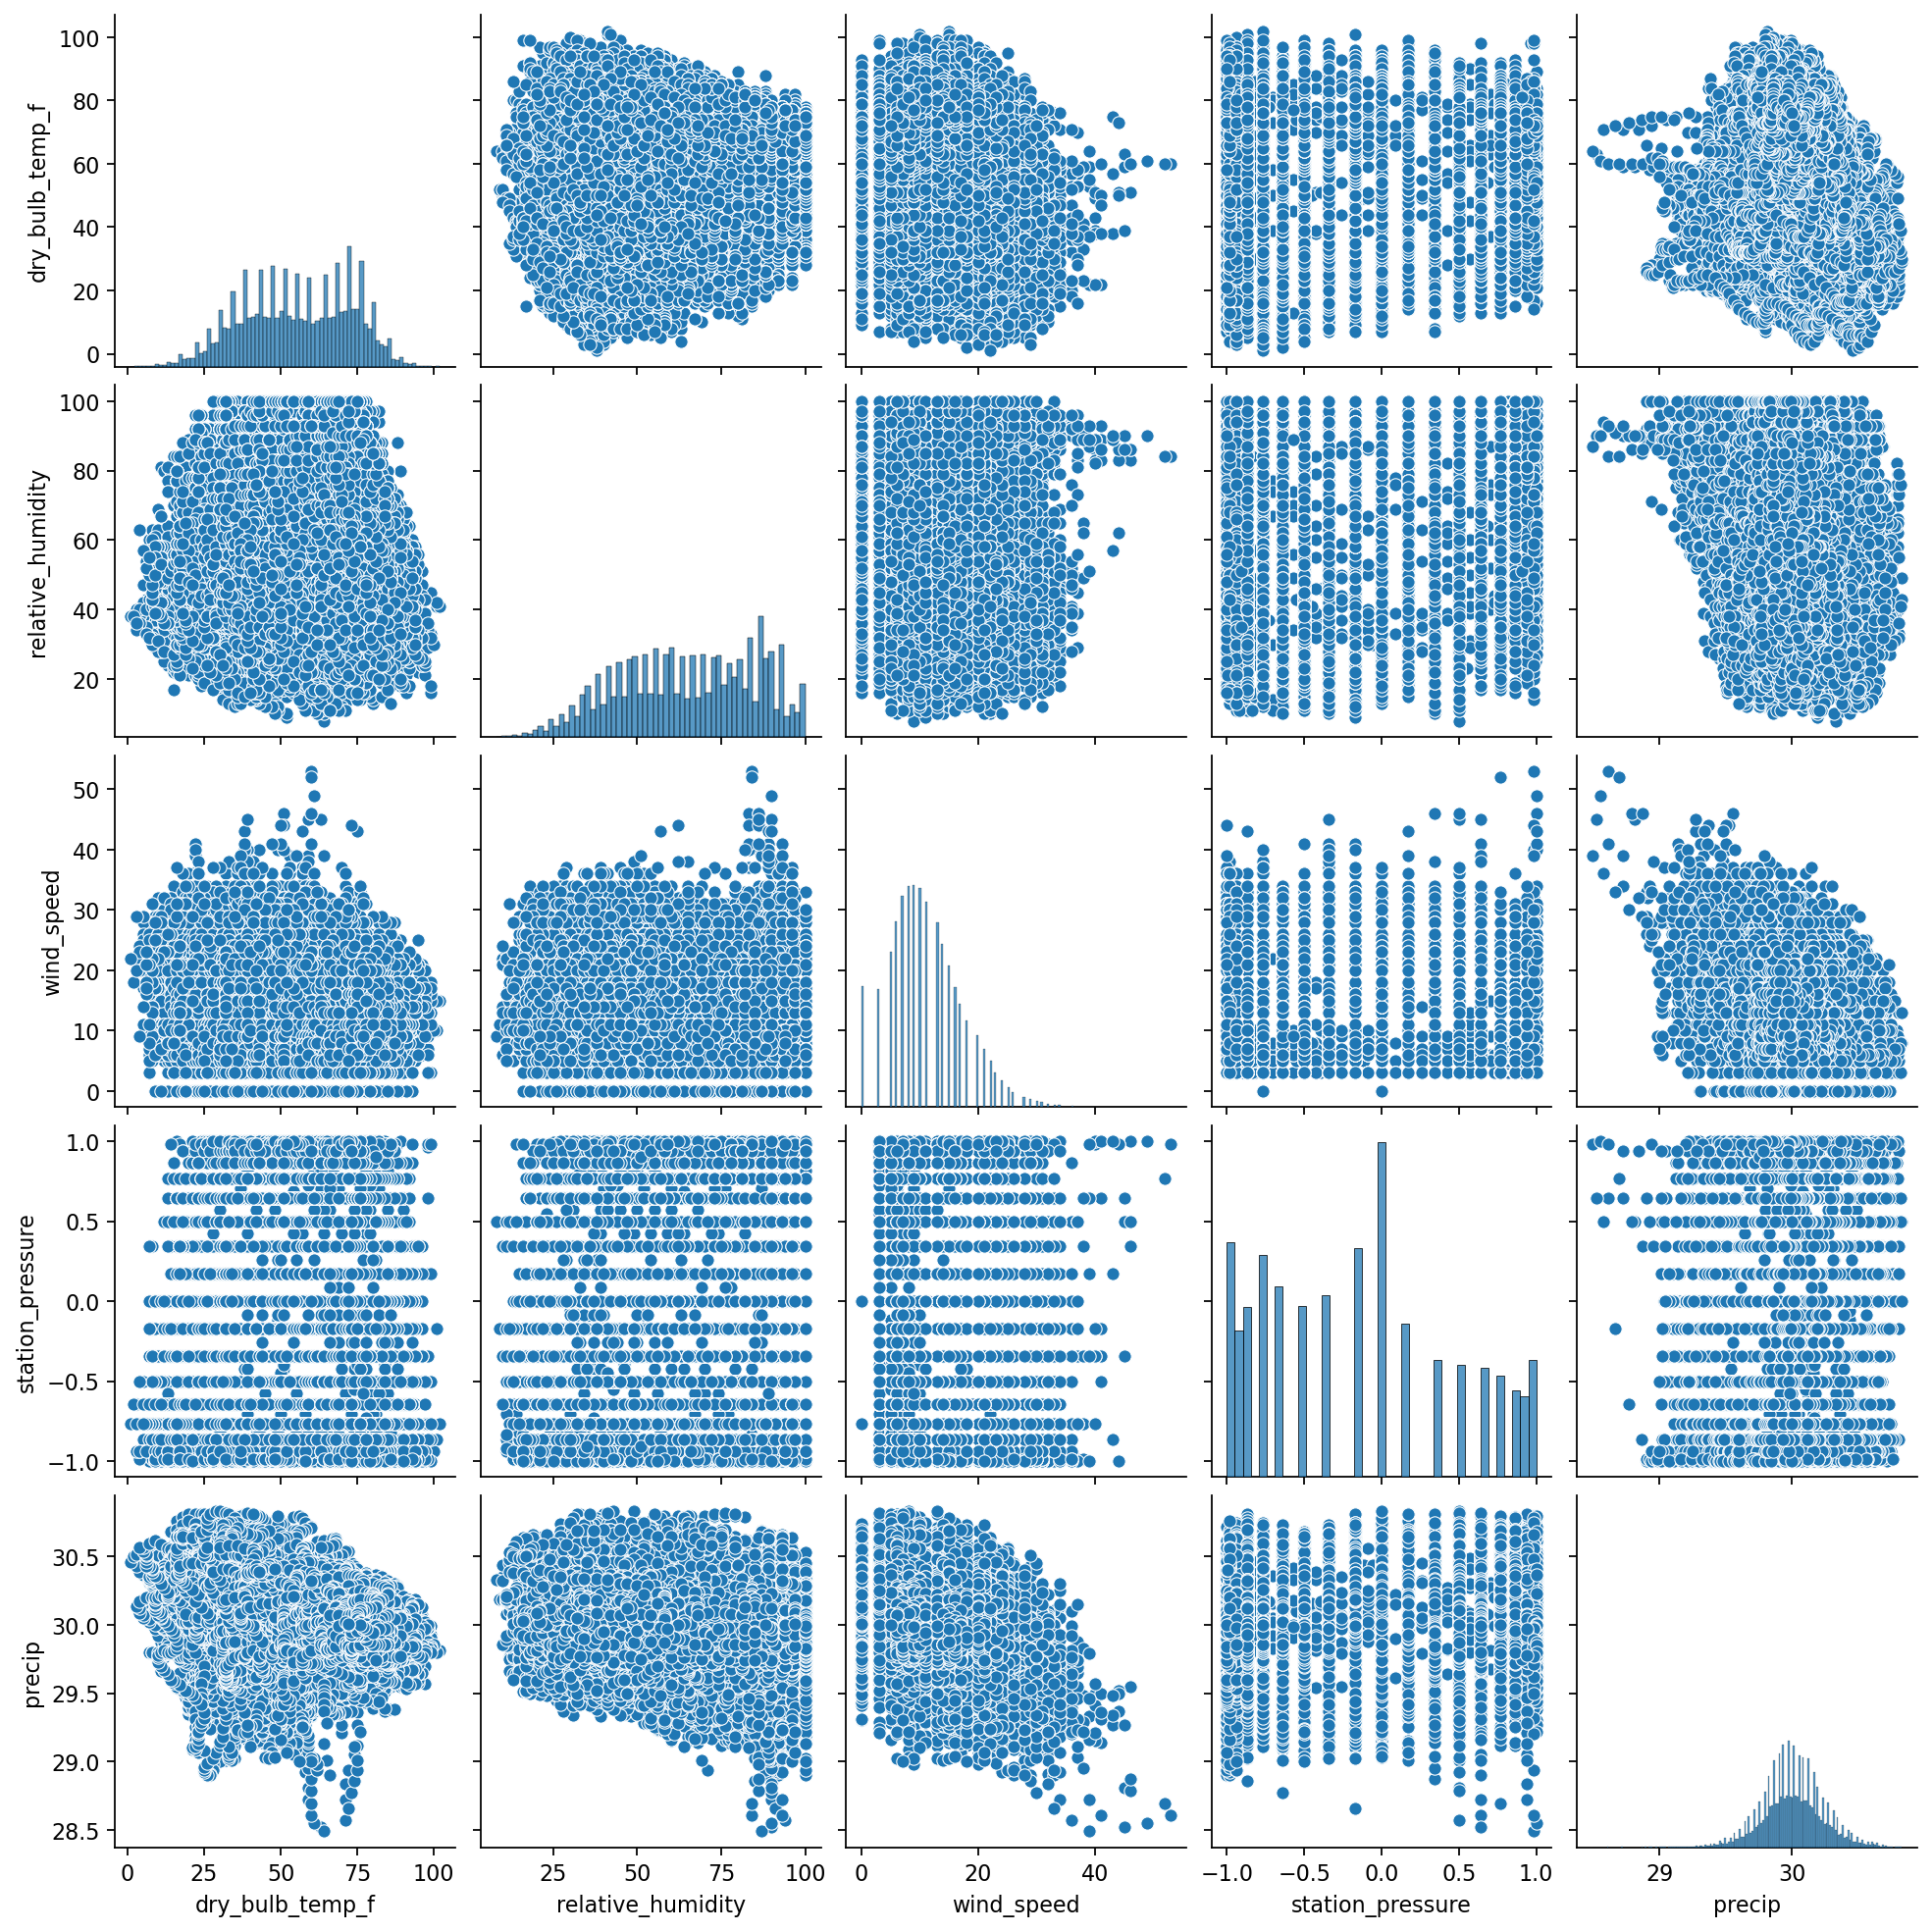

In [52]:
#Plot pairplots
sns.pairplot(data[plot_cols])

# Analyze Trends in the Data

Now that we have explored the whole dataset and the features on a high level, let us focus on the perticular feature - dry_bulb_temp_f, the dry bulb tempreture in degrees Fahrenheit. This is what we mean when we refer to "air tempreture". This is the most common festure used in tempreture prediction, and here we explore it in further detail.

We first start with plotting the data for all 9 years in monthly buckets then drill down to a single year to notice (qualitatively) the overall trend in the data. We can see from the plots that every year has roughly a sinousodial nature to the tempreture with some anomalies around 2013-2014. Upon further drilling down we see that each year's data is not smooth sinousoid but rather a jagged and noisy one. But the overall trend still is a sinousoid.

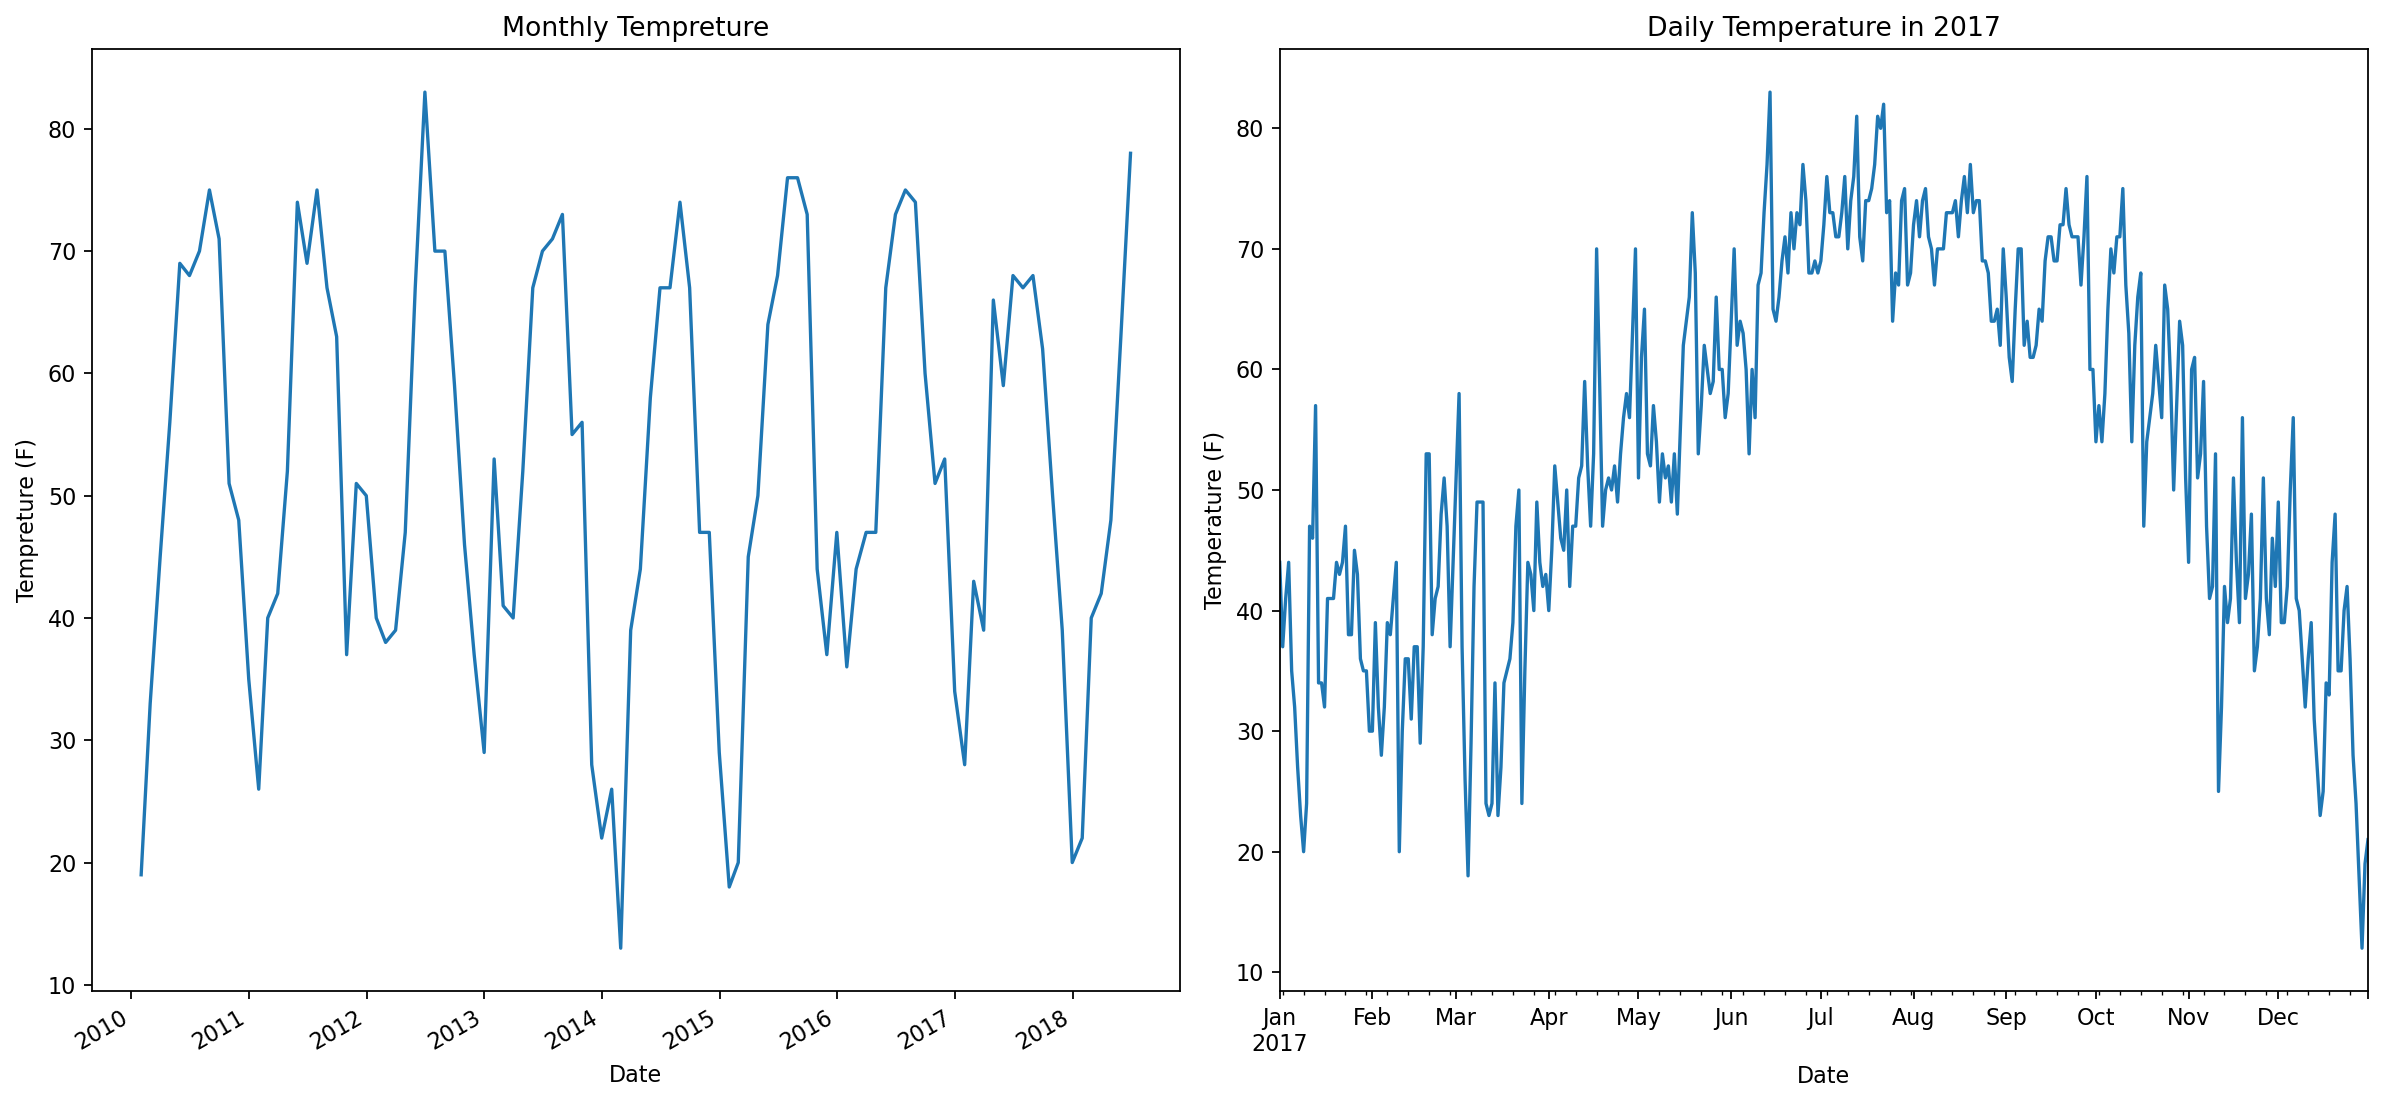

In [55]:
plt.figure(figsize=(15,7))

TEMP_COL = 'dry_bulb_temp_f'
#Plot tempreture data converted to a monthly frequency
plt.subplot(1,2,1)
#data = data[~data.index.duplicated(keep='first')]
data[TEMP_COL].asfreq('M').plot()
plt.title('Monthly Tempreture')
plt.ylabel('Tempreture (F)')

#Zoom in on a year and plot tempreture data converted to a daily frequency
plt.subplot(1,2,2)
data.loc['2017', TEMP_COL].asfreq('D').plot()
plt.title('Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

Next, we plot the change (delta) in temperature and notice that it is lowest around the middle of the year. That is expected behaviour as the gradient of the sinousoid near it's peak is zero.

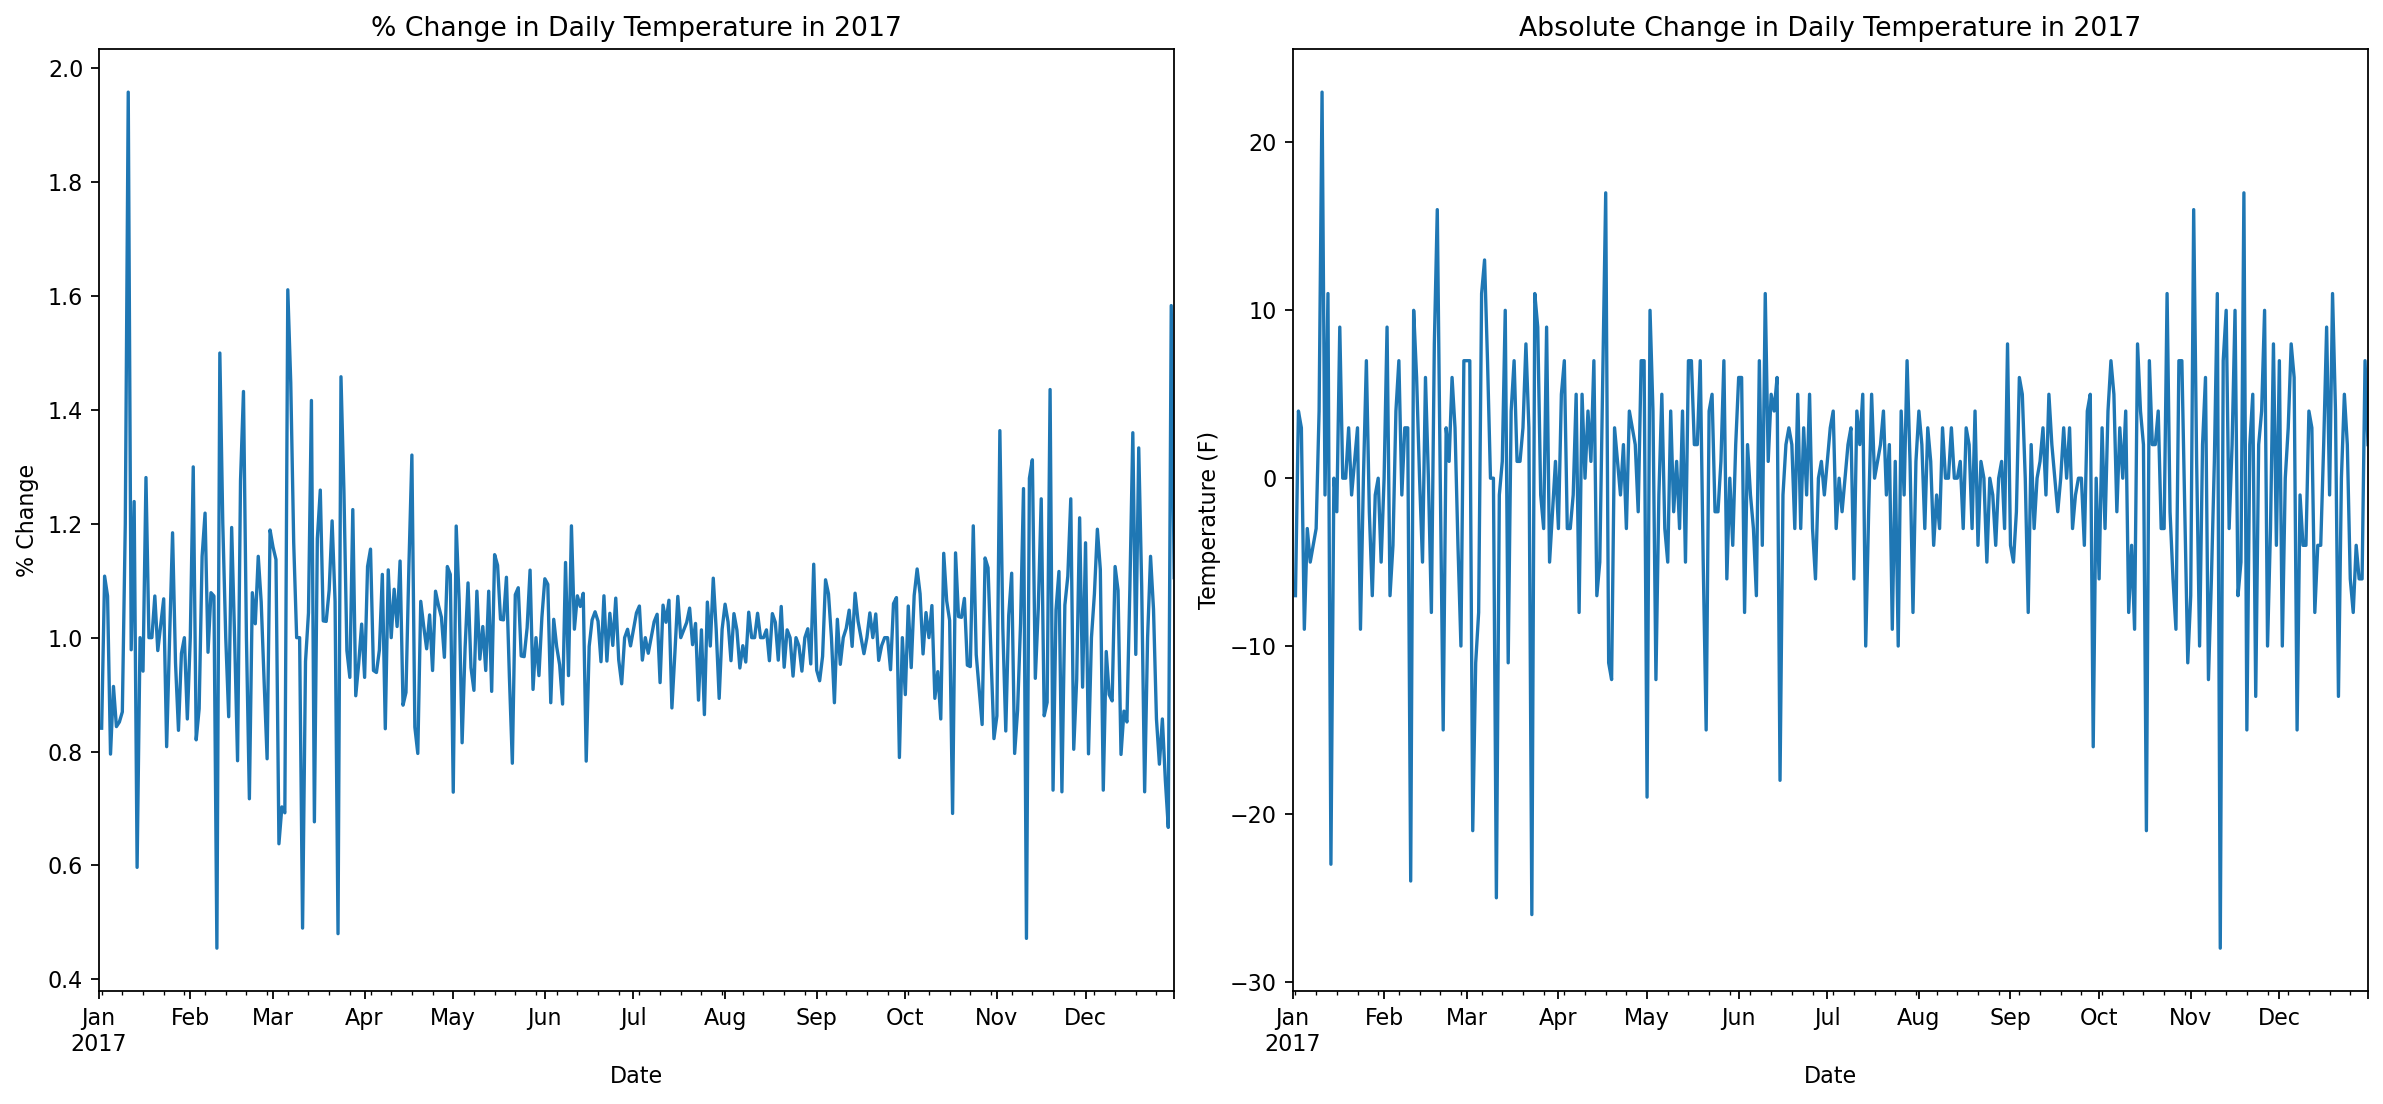

In [56]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].asfreq('D').div(
    data.loc['2017', TEMP_COL].asfreq('D').shift()
).plot()
plt.title('% Change in Daily Temperature in 2017')
plt.ylabel('% Change')

# Plot absolute change of temperature in 2017 with daily frequency
plt.subplot(1, 2, 2)

data.loc['2017', TEMP_COL].asfreq('D').diff().plot()

plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

Finally we apply some smoothing to the data in the form of a rolling/moving average. This is the simplest form of de-noising the data. As we can see from the plots, the average (plotted in blue) roughly traces the sinousoid and is now much smoother. This can improve the accuracy of a regression model trained to predict temperatures within a reasonable margin of error.

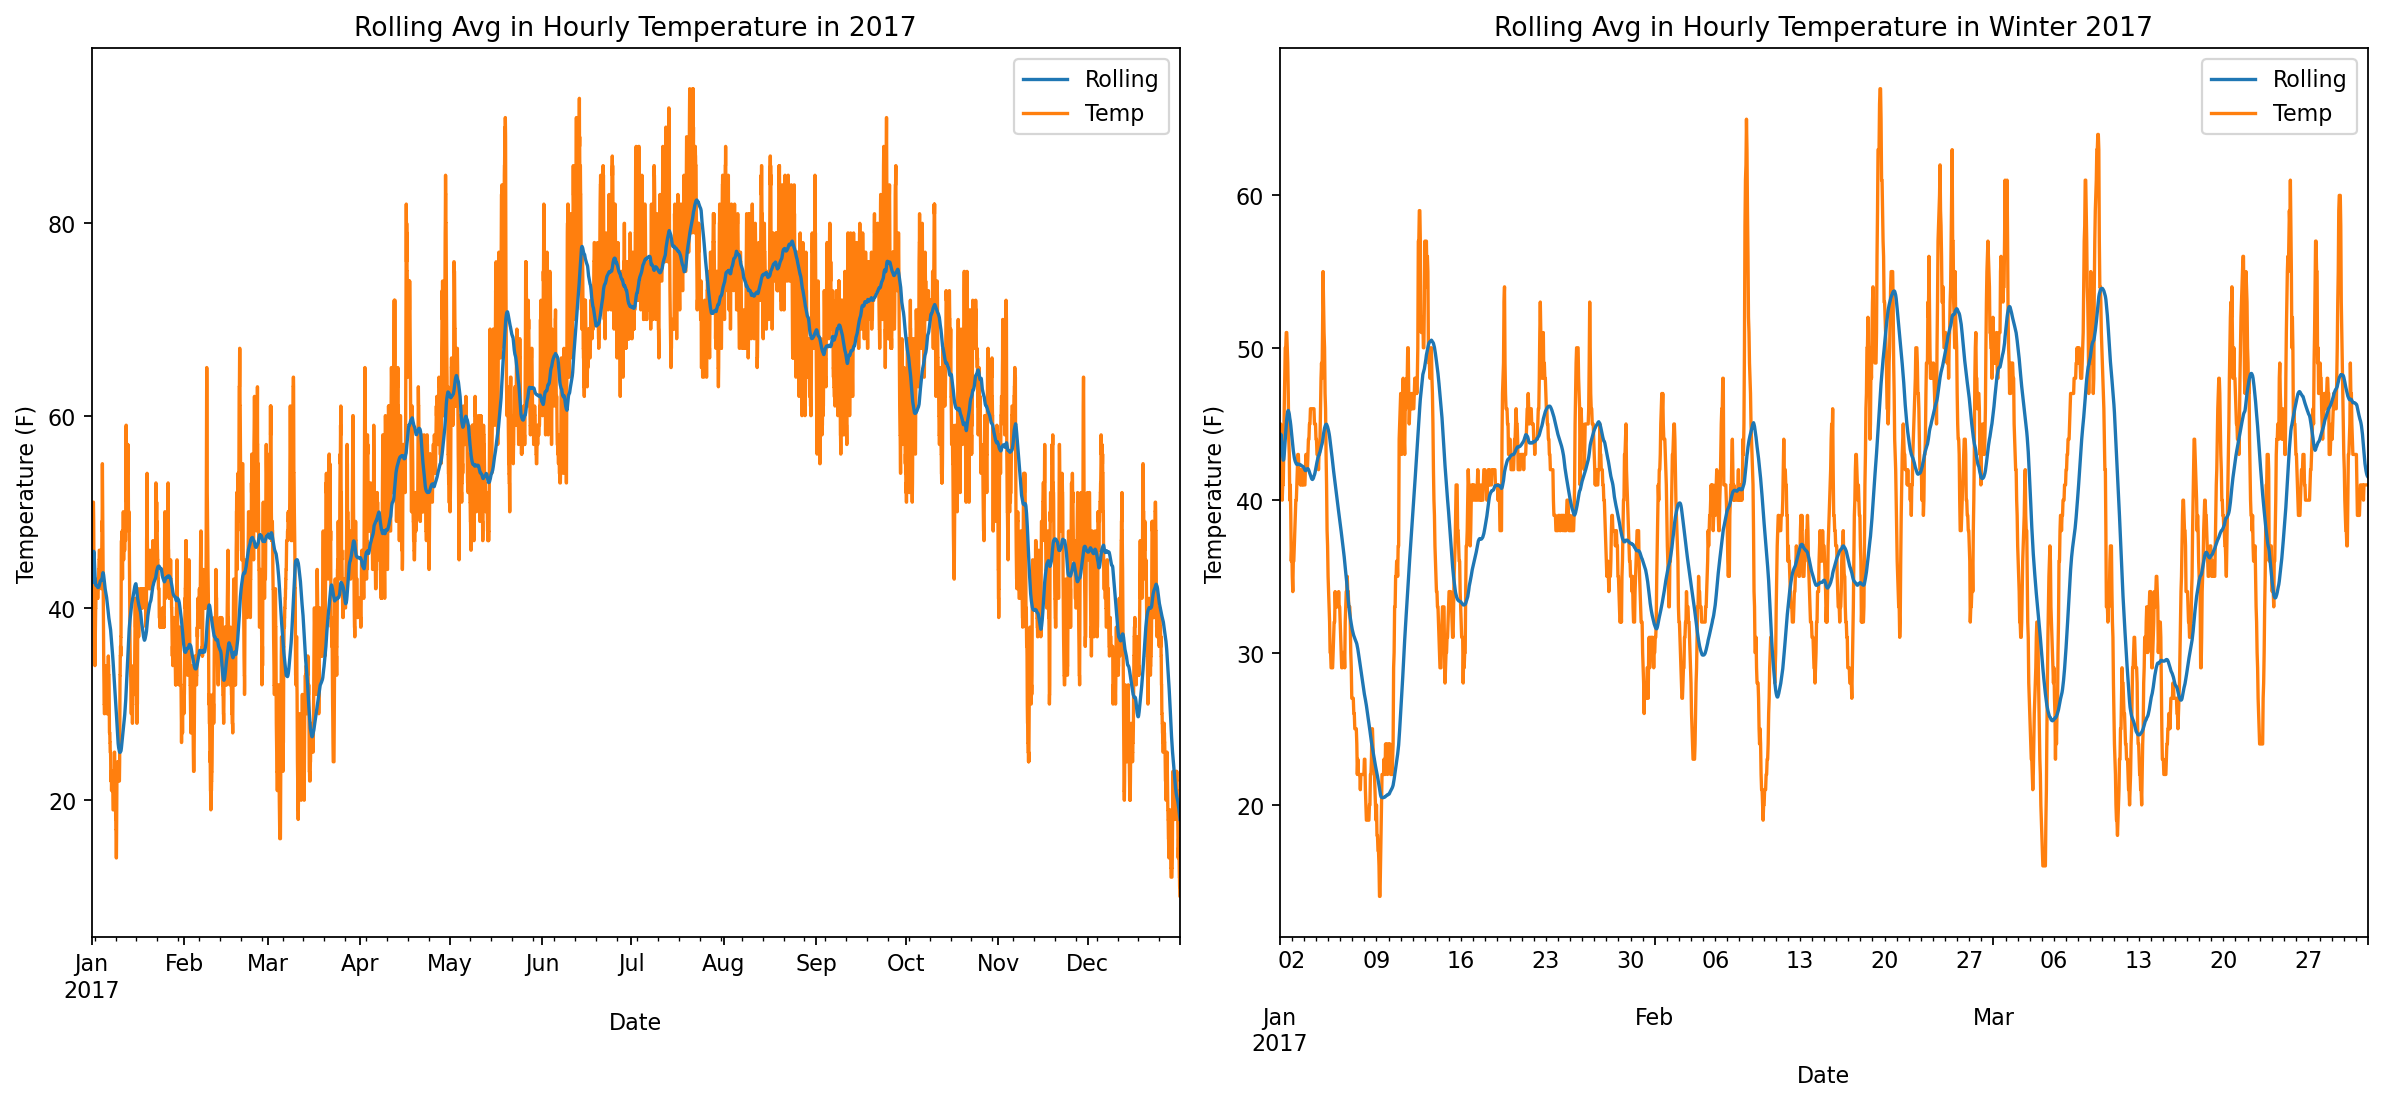

In [57]:
plt.figure(figsize=(15, 7))

# Plot rolling mean of temperature 
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].rolling('5D').mean().plot(zorder=2)  # 5-day rolling mean
data.loc['2017', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in 2017')
plt.ylabel('Temperature (F)')

# Plot rolling mean of temperature for Jan–Mar 2017
plt.subplot(1, 2, 2)
data.loc['2017-01':'2017-03', TEMP_COL].rolling('2D').mean().plot(zorder=2)  # 2-day rolling mean
data.loc['2017-01':'2017-03', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in Winter 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

# Part 3: Time Series Forecasting

In [58]:
%%capture
#Install required libraries
!pip install scikit-learn
!!pip install statsmodels

In [59]:
#Import required modules
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

For purposes of time-series modeling, we will restrict our analysis to a 2-year sample of the dataset to avoid overly long model-training times.

In [61]:
data.reset_index(inplace=True)
data['DATE'] = pd.to_datetime(data['Date'])

# Step 2: Set 'DATE' as the index
data.set_index('DATE', inplace=True)

# Step 3: Now slice using date strings
sample = data['2016-01-01':'2018-01-01']
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17568 entries, 2016-01-01 00:00:00 to 2018-01-01 23:00:00
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   17568 non-null  int64         
 1   Date                    17568 non-null  datetime64[ns]
 2   Visibility              17568 non-null  float64       
 3   dry_bulb_temp_f         17568 non-null  float64       
 4   wet_bulb_temp_f         17568 non-null  float64       
 5   dew_point_temp_f        17568 non-null  float64       
 6   relative_humidity       17568 non-null  float64       
 7   wind_speed              17568 non-null  float64       
 8   station_pressure        17568 non-null  float64       
 9   sea_level_pressure      17568 non-null  float64       
 10  precip                  17568 non-null  float64       
 11  altimeter_setting       17568 non-null  int64         
 12  wind_direct

# Create Training/Validation/Test Splits

Before we attempt any time-series analysis and prediction, we should split the dataset into training, validation and test sets. We use a portion of the data for training, and a portion of future data for our validation and test sets.

If we instead trained a model on the full dataset, the model would learn to be very good at making predictions on that particular dataset, essentially just copying the answers it knows. However, when presented with data the model has not seen , it would perform poorly since it has not learned how to generalize its answers.

By training on a portion of the dataset and testing the model's performance on another portion of the dataset (which data the model has not seen in training), we try to avoid our models "over-fitting" the dataset and make them better at predicting temperatures given unseen, future data. This process of splitting the dataset and evaluating a model's performance on the validation and test sets is commonly known as cross-validation).

By default here we use 80% of the data for the training set and 10% each for validation and test sets.

In [62]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    Splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data) * (1 - test_size - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]
    
    return df_train, df_val, df_test


# Create data split
df_train, df_val, df_test = split_data(sample)

print('Total data size:      {} rows'.format(len(sample)))
print('Training set size:    {} rows'.format(len(df_train)))
print('Validation set size:  {} rows'.format(len(df_val)))
print('Test set size:        {} rows'.format(len(df_test)))

Total data size:      17568 rows
Training set size:    14054 rows
Validation set size:  1757 rows
Test set size:        1757 rows


# Explore Baseline Models

In this section, we'll create a few simple predictive models of temperature, using shifting and rolling averages. These will serve as a baseline against which we can compare more sophisticated models.

Using values at recent timesteps (such as the most recent timestep t-1 and second-most recent timestep t-2) to predict the current value at time t is what's known as persistence modeling, or using the last observed value to predict the next following value. These preceding timesteps are often referred to in time-series analysis as lags. So, the value at time t-1 is known as the 1st lag and the value at time t-2 is the 2nd lag.

We can also create baselines based on rolling (or moving) averages. This is a time-series constructed by averaging each lagged value up to the selected lag. For example, a 6-period (or 6-lag) rolling avearge is the average of the previous 6 hourly lags t-6 to t-1.

Our baseline models will be:

* 1st lag - i.e. values at t-1
- 2nd lag - i.e. values at t-2
- 6-lag rolling average
* 12-lag rolling average

In [63]:
%%capture
# define the column containing the data we wish to model - in this case Dry Bulb Temperature (F)
Y_COL = 'dry_bulb_temp_f'

# Use shifting and rolling averages to predict Y_COL (t)
n_in = 2
n_out = 1
features = [Y_COL]
n_features = len(features)

# create the baseline on the entire sample dataset.
# we will evaluate the prediction error on the validation set
baseline = sample[[Y_COL]].loc[:]
baseline['{} (t-1)'.format(Y_COL)] = baseline[Y_COL].shift(1)
baseline['{} (t-2)'.format(Y_COL)] = baseline[Y_COL].shift(2)
baseline['{} (6hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('6H').mean()
baseline['{} (12hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('12H').mean()
baseline.dropna(inplace=True)
baseline.head(10)

Next, we will plot data from our validation dataset to get a sense for how well these baseline models predict the next hourly temperature. Note thatd we only use a few days of data in order to make the plot easier to view.

In [64]:
# plot first 7 days of the validation set, 168 hours 
start = df_val.index[0]
end = df_val.index[167]
sliced = baseline[start:end]

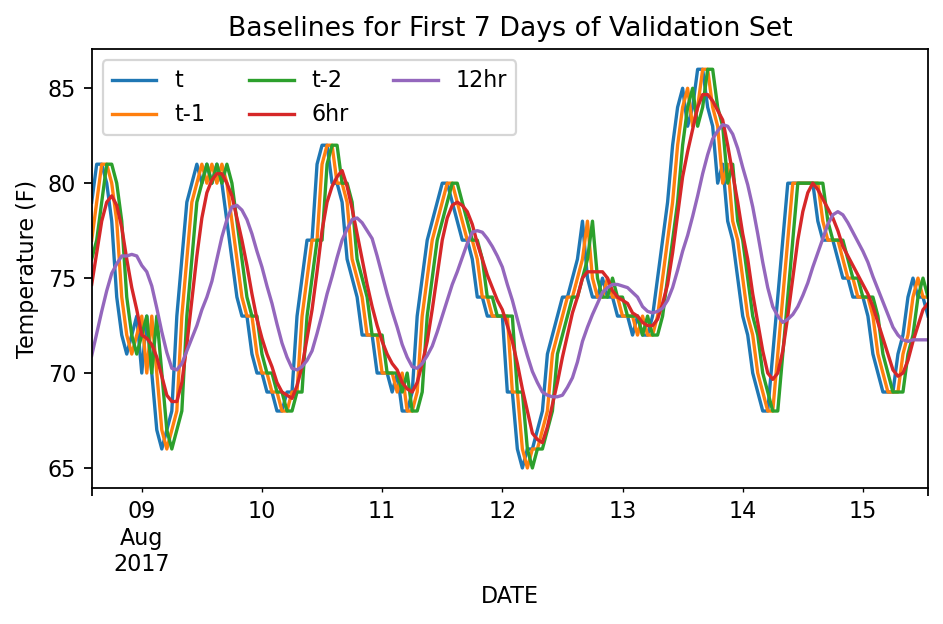

In [65]:
# Plot baseline predictions sample
cols = ['dry_bulb_temp_f', 'dry_bulb_temp_f (t-1)', 'dry_bulb_temp_f (t-2)', 'dry_bulb_temp_f (6hr rollavg)', 'dry_bulb_temp_f (12hr rollavg)']
sliced[cols].plot()

plt.legend(['t', 't-1', 't-2', '6hr', '12hr'], loc=2, ncol=3)
plt.title('Baselines for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
plt.show()

Evaluate baseline models As you can perhaps see from the graph above, the lagged baselines appear to do a better job of forecasting temperatures than the rolling average baselines.

In order to evaluate our baseline models more precisely, we need to answer the question "how well do our models predict future temperature?". In regression problems involving prediction of a numerical value, we often use a measure of the difference between our predicted value and the actual value. This is referred to as an error measure or error metric. A common measure is the Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

This is the average of the squared differences between predicted values
and actual values
.

Because the MSE is in "units squared" it can be difficult to interpet, hence the Root Mean Squared Error (RMSE) is often used:
$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

This is the square root of the MSE, and is in the same units as the values
. We can compare the RMSE (and MSE) values for different models and say that the model that has the lower MSE is better at predicting temperatures, all things equal. Note that MSE and RMSE will grow large quickly if the differences between predicted and actual values are large. This may or may not be a desired quality of your error measure. In this case, it is probably a good thing, since a model that makes large mistakes in temperature prediction will be much less useful than one which makes small mistakes.

Next, we calculate the RMSE measure for each of our baseline models, on the full validation set.

In [66]:
# Calculating baseline RMSE
start_val = df_val.index[0]
end_val = df_val.index[-1]
baseline_val = baseline[start_val:end_val]

baseline_y = baseline_val[Y_COL]
baseline_t1 = baseline_val['dry_bulb_temp_f (t-1)']
baseline_t2 = baseline_val['dry_bulb_temp_f (t-2)']
baseline_avg6 = baseline_val['dry_bulb_temp_f (6hr rollavg)']
baseline_avg12 = baseline_val['dry_bulb_temp_f (12hr rollavg)']

rmse_t1 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t1)), 2)
rmse_t2 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t2)), 2)
rmse_avg6 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg6)), 2)
rmse_avg12 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg12)), 2)

print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))
print('Baseline t-2 RMSE:            {0:.3f}'.format(rmse_t2))
print('Baseline 6hr rollavg RMSE:    {0:.3f}'.format(rmse_avg6))
print('Baseline 12hr rollavg RMSE:   {0:.3f}'.format(rmse_avg12))

Baseline t-1 RMSE:            1.690
Baseline t-2 RMSE:            2.880
Baseline 6hr rollavg RMSE:    3.080
Baseline 12hr rollavg RMSE:   5.010


The RMSE results confirm what we saw in the graph above. It is clear that the rolling average baselines perform poorly. In fact, the t-2 lagged baseline is also not very good. It appears that the best baseline model is to simply use the current hour's temperature to predict the next hour's temperature!

Can we do better than this simple baseline using more sophisticated models?

# Train Statistical Time-series Analysis Models

In the previous section, we saw that a simple lag-1 baseline model performed reasonably well at forecasting temperature for the next hourly time step. This is perhaps not too surprising, given what we know about hourly temperatures. Generally, the temperature in a given hour will be quite closely related to the temperature in the previous hour. This phenomenon is very common in time-series analysis and is known as autocorrelation - that is, the time series is correlated with previous values of itself. More precisely, the values at time t are correlated with lagged values (which could be t-1, t-2 and so on).

Another thing we saw previously is the concept of moving averages. In this case the moving-average baseline was not that good at prediction. However it is common in many time-series for a moving average to capture some of the underlying structure and be useful for prediction.

In order to make our model better at predicting temperature, ideally we would want to take these aspects into account. Fortunately, the statistical community has a long history of analyzing time series and has created many different forecasting models.

Here, we will explore one called SARIMAX - the Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model.

This sounds like a very complex name, but if we look at the components of the name, we see that it includes autocorrelation (this is what auto regressive means) and moving averages, which are the components mentioned above.

The SARIMAX model also allows including a seasonal model component as well as handling exogenous variables, which are external to the time-series value itself. For example, for temperature prediction we may wish to take into account not just previous temperature values, but perhaps other weather features which may have an effect on temperature (such as humidity, rainfall, wind, and so on).

For the purposes of this notebook, we will not explore modeling of seasonal components or exogenous variables.

If we drop the "S" and "X" from the model, we are left with an ARIMA model (Auto-regressive Integrated Moving Average). This is a very commonly used model for time-series analysis and we will use it in this notebook by only specifying the relevant model components of the full SARIMAX model.

# Replicating a baseline model

As a starting point, we will see how we can use SARIMAX to create a simple model that in fact replicates one of the baselines we created previously. Auto-regression, as we have seen, means using values from preceding time periods to predict the current value. Recall that one of our baseline models was the 1st lag or t-1 model. In time-series analysis this is referred to as an AR(1) model, meaning an Auto-Regressive model for lag 1.

Technically, the AR(1) model is not exactly the same as our baseline model. A statistical time series model like SARIMAX learns a set of weights to apply to each component of the model. These weights are set so as to best fit the dataset. We can think of our baseline as setting the weight for the t-1 lag to be exactly 1. In practice, our time-series model will not have a weight of exactly 1 (though it will likely be very close to that), hence the predictions will be slightly different.

Now, lets fit our model to the dataset. First, we will set up the model inputs by taking the temperature column of our dataframe. We do this for training and validation sets.

In [67]:
X_train = df_train[Y_COL]
X_val = df_val[Y_COL]
X_both = np.hstack((X_train, X_val))

Here we created a variable called X_both to cover both the training and validation data. This is required later when we forecast values for our SARIMAX model, in order to give the model access to all the datapoints for which it must create forecasts. Note that the forecasts themselves will only be based on the model weights learned from the training data (this is important for over-fitting as we have seen above)!

The SARIMAX model takes an argument called order: this specifies the components of the model and itself has 3 parts: (p, d, q). p denotes the lags for the AR model and q denotes the lags for the MA model. We will not cover the d parameter here. Taken together this specifies the parameters of the ARIMA model portion of SARIMAX.

To create an AR(1) model, we set the order to be (1, 0, 0). This sets up the AR model to be a lag 1 model. Then, we fit our model on the training data and inspect a summary of the trained model.

In [68]:
%%capture
order = (1, 0, 0)
model_ar1 = SARIMAX(X_train, order=order)
results_ar1 = model_ar1.fit()
results_ar1.summary()

**Warnings**

[1] Covariance matrix calculated using the outer product of gradients (complex-step). There's quite a lot of information printed out in the model summary above. Much of it is related to the statistical properties of our model.

The most important thing for now is to look at the second table, where we can see a coef value of 0.9996 for the weight ar.L1. This tells us the model has set a weight for the 1st lag component of the AR model to be 0.9996. This is almost 1 and hence we should expect the prediction results to indeed be close to our t-1 baseline.

Let's create our model forecast on the validation dataset. We will then plot a few data points like we did with our baseline models (using 7 days of validation data) and compute the RMSE value based on the full validation set.

In [69]:
full_data_ar1 = SARIMAX(X_both, order=order)
model_forecast_ar1 = full_data_ar1.filter(results_ar1.params)

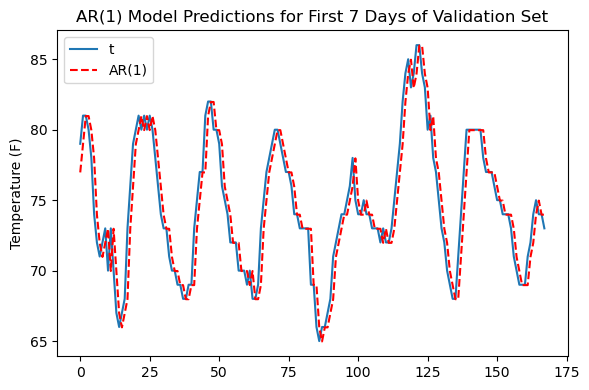

In [70]:
start = len(X_train)
end = len(X_both)
forecast_ar1 = model_forecast_ar1.predict(start=start, end=end - 1, dynamic=False)

# plot actual vs predicted values for the same 7-day window for easier viewing
plt.plot(sliced[Y_COL].values)
plt.plot(forecast_ar1[:168], color='r', linestyle='--')
plt.legend(['t', 'AR(1)'], loc=2)
plt.title('AR(1) Model Predictions for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()

We can see that the plot looks almost identical to the plot above, for the t and t-1 baseline values.

Next, we compute the RMSE values.

In [71]:
# compute print RMSE values
rmse_ar1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar1))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(1) RMSE:                   1.692
Baseline t-1 RMSE:            1.690


We can see that the RMSE values for the validation set also almost identical.

# Create a more complex model

One of our baseline models was a lag 2 model, i.e. t-2. We saw that it performed a lot worse than the t-1 baseline. 
Intuitively, this makes sense, since we are throwing away a lot of information about the most recent lag t-1. 
However, the t-2 lag still provides some useful information. 
In fact, for temperature prediction its likely that the last few hours can provide some value.

Fortunately, our ARIMA model framework provides an easy way to incorporate further lag information. 
We can construct a model that includes both the t-1 and t-2 lags. 
This is an AR(2) model (meaning an auto-regressive model up to lag 2). 
We can specify this with the model order parameter p=2.

In [74]:
%%capture
order = (2, 0, 0)
model_ar2 = SARIMAX(X_train, order=order)
results_ar2 = model_ar2.fit()
results_ar2.summary()

**Warnings:**

[1] Covariance matrix calculated using the outer product of gradients (complex-step).

This time, the results table indicates a weight for variable ar.L1 and ar.L2. Note the values are now quite different from 1 (or 0.5 say, for a simple equally-weighted model). Next, we compute the RMSE on the validation set.

In [75]:
full_data_ar2 = SARIMAX(X_both, order=order)
model_forecast_ar2 = full_data_ar2.filter(results_ar2.params)

start = len(X_train)
end = len(X_both)
forecast_ar2 = model_forecast_ar2.predict(start=start, end=end - 1, dynamic=False)

# compute print RMSE values
rmse_ar2 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2))
print('AR(2) RMSE:                   {0:.3f}'.format(rmse_ar2))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(2) RMSE:                   1.526
AR(1) RMSE:                   1.692
Baseline t-1 RMSE:            1.690


We've improved the RMSE value by including information from the first two lags.

In fact, you will see that if you continue to increase the p parameter value, the RMSE will continue to decrease, indicating that a few recent lags provide useful information to our model.

# Incorporate moving averages

Finally, what if we also include moving average information in our model? The ARIMA framework makes this easy to do, by setting the order parameter q. A value of q=1 specifies a MA(1) model (including the first lag t-1), while q=6 would include all the lags from t-1 to t-6.

Note that the moving average model component is a little different from the simple moving or rolling averages computed in the baseline models. The definition of the MA model is rather technical, but conceptually you can think of it as using a form of weighted moving average (compared to our baseline which would be a simple, unweighted average).

Let's add an MA(1) component to our AR(2) model.

In [76]:
%%capture
order = (2, 0, 1)
model_ar2ma1 = SARIMAX(X_train, order=order)
results_ar2ma1 = model_ar2ma1.fit()
results_ar2ma1.summary()

**Warnings:**

[1] Covariance matrix calculated using the outer product of gradients (complex-step).

We see the results table shows an additional weight value for ma.L1, our MA(1) component. Next, we compare the RMSE to the other models and finally plot all the model forecasts together - note we use a much smaller 48-hour window to make the plot readable for illustrative purposes.

In [77]:
full_data_ar2ma1 = SARIMAX(X_both, order=order)
model_forecast_ar2ma1 = full_data_ar2ma1.filter(results_ar2ma1.params)

start = len(X_train)
end = len(X_both)
forecast_ar2ma1 = model_forecast_ar2ma1.predict(start=start, end=end - 1, dynamic=False)

# compute print RMSE values
rmse_ar2ma1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2ma1))
print('AR(2) MA(1) RMSE:             {0:.3f}'.format(rmse_ar2ma1))
print('AR(2) RMSE:                   {0:.3f}'.format(rmse_ar2))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(2) MA(1) RMSE:             1.491
AR(2) RMSE:                   1.526
AR(1) RMSE:                   1.692
Baseline t-1 RMSE:            1.690


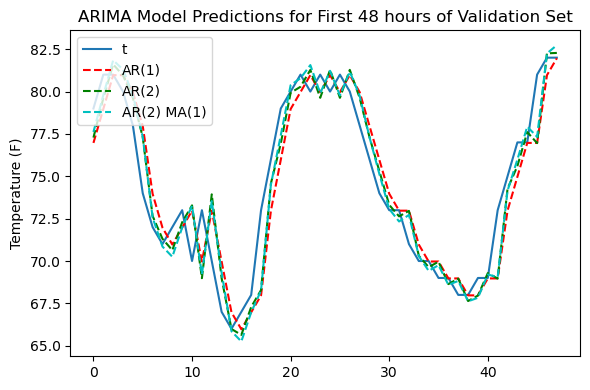

In [78]:
# plot actual vs predicted values for a smaller 2-day window for easier viewing
hrs = 48
plt.plot(sliced[Y_COL][:hrs].values)
plt.plot(forecast_ar1[:hrs], color='r', linestyle='--')
plt.plot(forecast_ar2[:hrs], color='g', linestyle='--')
plt.plot(forecast_ar2ma1[:hrs], color='c', linestyle='--')
plt.legend(['t', 'AR(1)', 'AR(2)', 'AR(2) MA(1)'], loc=2, ncol=1)
plt.title('ARIMA Model Predictions for First 48 hours of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()

We've again managed to reduce the RMSE value for our model, indicating that adding the MA(1) component has improved our forecast!

We've applied the basics of time-series analysis for forecasting hourly temperatures. See if we can further improve the RMSE values by exploring the different values for the model parameters p, q and even d!